### Table of contents:</br>
- [Random Forest classification model with minority class oversampled by synthetic data.](#synthetic_data)
- [For comparision purpose: Random Forest model the original dataset and no synthetic data.](#no_synthetic)
- [Random Forest regression model to predict time.](#regression)
- [Summary and discussion](#summary)

<a id = "synthetic_data"></a>
### I. Random Forest classification with synthetic data.

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_09385780d2da4cdb9b082b66a745c13f.csv"
df=pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
1,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
2,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
3,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
4,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


In [2]:
X=df.drop(["DEATH_EVENT"],axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
1,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16
2,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22
3,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29
4,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30


In [3]:
y=df[["DEATH_EVENT"]]
y.head()

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-1.016410,1.135682,-0.460164,-0.862896,-0.600430,1.363142,1.731772,-0.439685,0.352123,-1.341123,-0.65504,-1.332156
1,0.308306,1.135682,-0.481278,-0.862896,-1.010833,1.363142,0.163453,-0.207534,0.144659,-1.341123,-0.65504,-1.280840
2,-0.685231,-0.880528,-0.472984,1.158889,1.861986,-0.733599,1.118985,-0.594452,-0.270270,0.745644,-0.65504,-1.203868
3,-0.933615,1.135682,-0.400592,1.158889,-0.600430,-0.733599,0.433495,-0.284917,0.352123,-1.341123,-0.65504,-1.114066
4,-0.105668,-0.880528,1.482344,1.158889,-0.600430,-0.733599,0.464654,0.566302,0.144659,0.745644,-0.65504,-1.101238


In [7]:
X.shape

(403, 12)

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

n_samples=y.shape[0]
y=np.asarray(y).reshape(n_samples,)
estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(3),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 8


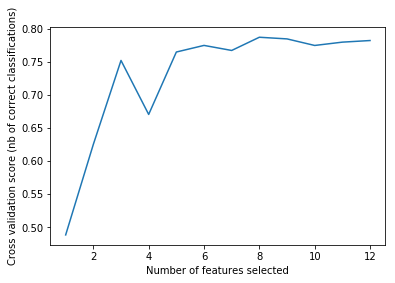

In [9]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [10]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})

features=selector[selector["Importance"]==1]
features.head()

,Importance
0,1
2,1
4,1
6,1
7,1


In [11]:
X=X.iloc[:,features.index]
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,smoking,time
0,-1.016410,-0.460164,-0.600430,1.731772,-0.439685,0.352123,-0.65504,-1.332156
1,0.308306,-0.481278,-1.010833,0.163453,-0.207534,0.144659,-0.65504,-1.280840
2,-0.685231,-0.472984,1.861986,1.118985,-0.594452,-0.270270,-0.65504,-1.203868
3,-0.933615,-0.400592,-0.600430,0.433495,-0.284917,0.352123,-0.65504,-1.114066
4,-0.105668,1.482344,-0.600430,0.464654,0.566302,0.144659,-0.65504,-1.101238


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = np.arange(2,11)
min_samples_leaf = np.arange(2,11)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [15]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, 

In [16]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [17]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.9180327868852459


In [18]:
from sklearn.metrics import classification_report
print("Classification_report on test data: \n",classification_report(y_test,y_pred,target_names=["0","1"]))

Classification_report on test data: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        34
           1       0.84      1.00      0.92        27

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



In [19]:
from sklearn.metrics import confusion_matrix
print("Confusion_matrix on test data: \n",confusion_matrix(y_test,y_pred))

Confusion_matrix on test data: 
 [[29  5]
 [ 0 27]]


<a id="no_synthetic"></a>
### II. Random Forest classification with no synthetic data.

Generating synthetic data and merging it with the original data take time. What if the minority class was not oversampled with synthetic data?

In [21]:
url='https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_2d3337fc76ea44caa286c0b9fd00f27f.csv'
df=pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
X=df.drop(["DEATH_EVENT"],axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [23]:
y=df[["DEATH_EVENT"]]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

n_samples=y.shape[0]
y=np.asarray(y).reshape(n_samples,)
estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(3),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 3


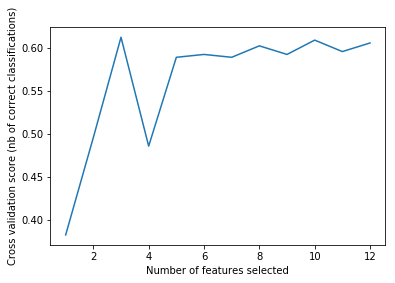

In [26]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [27]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})

features=selector[selector["Importance"]==1]
features.head()

,Importance
2,1
7,1
11,1


In [28]:
X=X.iloc[:,features.index]
X.head()

,creatinine_phosphokinase,serum_creatinine,time
0,0.000166,0.490057,-1.629502
1,7.514640,-0.284552,-1.603691
2,-0.449939,-0.090900,-1.590785
3,-0.486071,0.490057,-1.590785
4,-0.435486,1.264666,-1.577879


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = np.arange(2,11)
min_samples_leaf = np.arange(2,11)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [32]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, 

In [33]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [34]:
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.6888888888888889


In [35]:
from sklearn.metrics import classification_report
print("Classification_report on test data: \n",classification_report(y_test,y_pred,target_names=["0","1"]))

Classification_report on test data: 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.67      0.60      0.63        20

   micro avg       0.69      0.69      0.69        45
   macro avg       0.69      0.68      0.68        45
weighted avg       0.69      0.69      0.69        45



In [36]:
from sklearn.metrics import confusion_matrix
print("Confusion_matrix on test data: \n",confusion_matrix(y_test,y_pred))

Confusion_matrix on test data: 
 [[19  6]
 [ 8 12]]


**Everything else being the same,oversampling the minority class with synthetic data increases the model's accuracy on test data by 23% (92% vs 69%). Precision on minority class increases by 17% (84% vs. 67%) as well.**

<a id="regression"></a>
### III Random Forest regression to predict time in days

This dataset is also suitable for a regression task. We can predict the follow-up time in days on the subset of data that covered patients who passed away during the follow-up period. We will use a mix of synthetic data and original data. 

In [40]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_09385780d2da4cdb9b082b66a745c13f.csv"
df=pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
1,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
2,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
3,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
4,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


In [41]:
df=df[df['DEATH_EVENT']==1]
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
203,72.0,0,364,1,20,1,254000.0,1.3,136,1,1,59,1
204,95.0,1,371,0,30,0,461000.0,2.0,132,1,0,50,1
205,50.0,0,582,1,38,0,310000.0,1.9,135,1,1,35,1
206,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172,1
207,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1


In [42]:
df.shape

(200, 13)

In [45]:
df=df.drop(["DEATH_EVENT"],axis=1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.632871,-0.932287,-0.279948,1.139671,-1.124539,1.290994,0.002410,-0.405098,0.115891,0.758158,1.623688,-0.219048
1,2.414153,1.072631,-0.275854,-0.877446,-0.339246,-0.774597,2.185815,0.026349,-0.625812,0.758158,-0.615882,-0.362896
2,-1.070963,-0.932287,-0.152450,1.139671,0.288988,-0.774597,0.593089,-0.035286,-0.069535,0.758158,1.623688,-0.602643
3,-1.070963,-0.932287,-0.152450,-0.877446,1.231338,-0.774597,-1.062923,-0.836544,-0.254960,-1.318987,-0.615882,1.587041
4,0.477977,-0.932287,-0.398672,-0.877446,-0.731892,-0.774597,-0.103069,-0.466733,1.228446,-1.318987,-0.615882,-0.107167


In [46]:
X=df.drop(["time"],axis=1)
y=df[["time"]]

In [48]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

n_samples=y.shape[0]
y=np.asarray(y).reshape(n_samples,)
estimator=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=0)
features=RFECV(estimator,step=1,cv=KFold(5),scoring="r2")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 8


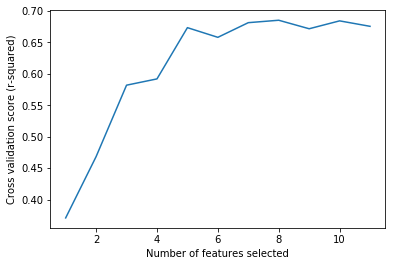

In [49]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r-squared)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [50]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})

features=selector[selector["Importance"]==1]
features.head()

,Importance
0,1
2,1
3,1
4,1
5,1


In [51]:
X=X.iloc[:,features.index]
X.head()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium
0,0.632871,-0.279948,1.139671,-1.124539,1.290994,0.002410,-0.405098,0.115891
1,2.414153,-0.275854,-0.877446,-0.339246,-0.774597,2.185815,0.026349,-0.625812
2,-1.070963,-0.152450,1.139671,0.288988,-0.774597,0.593089,-0.035286,-0.069535
3,-1.070963,-0.152450,-0.877446,1.231338,-0.774597,-1.062923,-0.836544,-0.254960
4,0.477977,-0.398672,-0.877446,-0.731892,-0.774597,-0.103069,-0.466733,1.228446


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(180, 8)
(20, 8)


In [68]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = np.arange(2,11)
min_samples_leaf = np.arange(2,11)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestRegressor(criterion="mse",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=

In [71]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [72]:
from sklearn.metrics import r2_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("R-squared on test data is: ",r2_score(y_test,y_pred))

R-squared on test data is:  0.876132456499168


R-squared on test data is 0.88. A very decent regression model.

<a id="summary"></a>
### IV. Summary and discussion

- Using synthetic data to balance the proportions between the majority class and the minority class increases the model's classification accuracy, i.e., whether a patient with heart failure will die or not, by 23%. The model's precision to the minority class, patients that died, increased by 17%. The classification model has an accuracy of 92% on test data.
- For the patients who would die of heart failure, a regression model was also  built to predict the time frame during which the patient might die. The regerssion model has an R-squared of 0.88 on test data. 

Heart diseas is the No.1 cause of death in the U.S. We have just a model that predicts whether a patient with heart failure will die or not. For patients who are predicted to die, we also have a model to predict the time frame during which the patient may die. 

My father died of lung-related problems. What if I had such models for patients with lung-related problems? Would it have made any difference for my family? I don't know, because I don't have such models for patients with lung-related problems.